OA3802 LAB 1: TWITTER SENTIMENT ANALYSIS

TASK 1

Using data scraped from twitter, we will import the json file (format of the sample data) and create a usable dictionary called tweets_data to store the tweets and associated information: 

In [1]:
import json
tweet_file= open("SampleData.txt", "r")
tweets_data=[]
for line in tweet_file:
    try:
        tweet=json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

The tweet data contains more information than simply the text of the tweet. Below is an example of one data point in the sample of tweets:

In [2]:
tweets_data[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Oct 05 00:25:10 +0000 2017',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'd3waapp.org',
    'expanded_url': 'http://d3waapp.org/',
    'indices': [76, 99],
    'url': 'https://t.co/cASF2MMXhB'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 915734574176628736,
 'id_str': '915734574176628736',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'ar',
 'place': None,
 'possibly_sensitive': False,
 'quote_count': 0,
 'reply_count': 0,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://vd1.co/lop" rel="nofollow">أذكـــــــــــــــــــــار</a>',
 'text': 'اللهم بشرني بالخير كما بشرت يعقوب بيوسف وبشرني بالفرح كما بشرت زكريا بيحيى  https://t.co/cASF2MMXhB',
 'timestam

Since we are only interested in the text of the tweets and their associated hashtags, we will create another list that contains only this information. Tweets without hashtags will be marked with NA. 

In [3]:
#Create a list of hashtags and associated tweets
import re
import pandas
i=0
hashtags=[]
#search for hashtags
regex = r'#\w+'
while i < len(tweets_data):
    #remove deleted tweets 
    if 'delete' in tweets_data[i]:
        i=i+1
    else:
        #pull text and hashtags from each tweet
        hasht= re.findall(regex,tweets_data[i]['text'])
        tweets = tweets_data[i]['text']
        if hasht==[]:
            #give value of NA to any tweet not containing a hashtag
            hasht='NA'
            hashtags.append([hasht,tweets])
            i=i+1
        else:
            #append list with hashtags and tweets
            hasht=hasht[0]
            hashtags.append([hasht,tweets])
            i=i+1
    

Printed below are the first five hashtags and tweets from the sample:

In [4]:
#First five in sample are printed
pandas.DataFrame(hashtags[0:5], columns=['Hashtag','Tweet'])

,Hashtag,Tweet
0,NA,اللهم بشرني بالخير كما بشرت يعقوب بيوسف وبشرني...
1,NA,@marialevicuna No se pase @Lenin otra correis...
2,NA,amateur porno tawny roberts sonia red universi...
3,#crowdfunding,RT @Crowdfund_Blog: Thanks for following @JT_A...
4,NA,今日はハロッズからほど近い場所に位置するマンダリンオリエンタルホテルロンドンのアフタヌーンテ...


Now, we will identify the top 5 hashtags most frequently used from the sample data:

In [5]:
#Create list of hashtags
hashtag=[item[0] for item in hashtags]
#Count how often a hashtag appears
wordCount = {}
for tag in hashtag:
     if tag in wordCount:
         wordCount[tag] += 1
     else:
         wordCount[tag] = 1
#Find top five, note NA will be in place 0 in the list            
Best = sorted(wordCount, key = wordCount.get, reverse = True)
Top_5=[]
for tags in Best[1:6]:
    num=wordCount[tags]
    Top_5.append([tags,num])
pandas.DataFrame(Top_5, columns=['Hashtag','Frequency'])
    
    


,Hashtag,Frequency
0,#izmirescort,46
1,#MPN,36
2,#ร,22
3,#ALDUB116thWeeksary,11
4,#Empire,8


Graphing the top 5 hashtags in a bar chart can provide a visual for how frequently they appear in the data set.

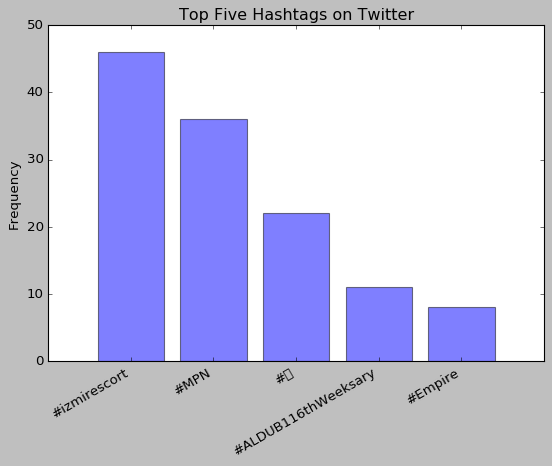

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
#create list of x and y values    
objects = []
performance = []
for item in Top_5:
    objects.append(item[0])
    performance.append(item[1])

#graph barplot
y_pos = np.arange(len(objects))
fig, ax = plt.subplots()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Top Five Hashtags on Twitter')
fig.autofmt_xdate()
plt.show()


TASK 2

Each tweet has a sentiment associated with it that can be identified by the individual words it contains. We will calculate and derive a sentiment value for each tweet from the sample. 

To calculate a sentiment score, we will use AFINN-111.txt that contains a list of words with precomputed sentiment scores based upon their connotation. Then, each tweet will be given a total sentiment score based upon its word make up.

Below, we load AFINN-111.txt file with sentiment scores:

In [7]:
#Load AFINN file to create a dictionary of words and their sentiment score
afinnfile = open("AFINN-111.txt")
scores = {} # initialize an empty dictionary
for line in afinnfile:
  term, score  = line.split("\t")  # The file is tab-delimited. "\t" means "tab character"
  scores[term] = int(score)  # Convert the score to an integer.

#print(scores.items()) # Print every (term, score) pair in the dictionary

The code below assigns a sentiment score to each tweet in the sample and prints the first 11 tweets with their respective score:

In [8]:
#convert unicode characters to a usable format
unicode_string = u"aaaÃ Ã§Ã§Ã§Ã±Ã±Ã±"
encoded_string = unicode_string.encode('utf-8')
#print(encoded_string)

#create list of tweets
tweetList= [item[1] for item in hashtags]
i=0
regex=r'\w+'
sentiment=[]
while i< len(tweetList):
    words=[re.findall(regex,tweetList[i])]
    grade=[]
    j=0
    while j < len(words[0]):
        #account for lower case syntax in scores with .lower()
        if words[0][j].lower() in scores.keys():
            #pull value of each word
            value=scores[words[0][j].lower()]
            #append
            grade.append(value)
            j=j+1
        else:
            j=j+1
    #calculate the sentiment score my summing each word value
    total=sum(grade)
    t=tweetList[i]
    #append sentiment list with tweet and calculated sentiment score
    sentiment.append([t,total])
    i=i+1
    
pandas.DataFrame(sentiment[0:11], columns=['Tweet','Sentiment Score'])           

,Tweet,Sentiment Score
0,اللهم بشرني بالخير كما بشرت يعقوب بيوسف وبشرني...,0
1,@marialevicuna No se pase @Lenin otra correis...,-1
2,amateur porno tawny roberts sonia red universi...,0
3,RT @Crowdfund_Blog: Thanks for following @JT_A...,3
4,今日はハロッズからほど近い場所に位置するマンダリンオリエンタルホテルロンドンのアフタヌーンテ...,0
5,タオル渡すつばち、ロマンだよね(?),0
6,二日酔い過ぎて寝たいのに寝れない…胃が気持ち悪い👻👻👻,0
7,RT @CNCOmusic: @starzabdiel @Dabey92 es un reg...,0
8,"I want to win big with @mousesports, #DrPepper...",6
9,RT @Los40_SLP: ¿Quién es tu boyband favorita?\...,0


TASK 3

There are several words within my sample of tweets that are not found within the AFINN-111 text file (imported into python earlier as a dictionary called scores). I will calculate a sentiment score for each english word and ammend the dictionary. First, I will subset the tweets that are in english. To maximize the likelyhood of returning only english tweets, I will discard tweets when fewer than 60% of its sentence is recognizable in the english language.

In [9]:
#Subset english Tweets
import enchant

d = enchant.Dict("en_US")
regex=r'\w+'
englishTweets=[]
for tweet in sentiment:
    sentence=[re.findall(regex,tweet[0])]
    count=0
    for part in sentence:
        for word in part:
            if d.check(word)==True:
                count=count+1
            else:
                continue
    if len(part)==0:
        continue
    else:
        #append only if 60% of the words in the text are english
        if count/len(part)>=.6:
            englishTweets.append(tweet)
        else:
            continue
pandas.DataFrame(englishTweets[0:11], columns=['Tweet','Sentiment Score'])

,Tweet,Sentiment Score
0,amateur porno tawny roberts sonia red universi...,0
1,RT @Crowdfund_Blog: Thanks for following @JT_A...,3
2,"I want to win big with @mousesports, #DrPepper...",6
3,RT @charlieefellows: I think the whole gymnast...,-3
4,RT @movietvtechgeek: Latest: ‘Star Wars Rebel...,-2
5,RT @MrFilmkritik: May Ginsburg live forever an...,0
6,RT @MissDomiStar: @kevinolearytv but to call t...,-3
7,RT @ArabelleRaphael: Sold my vid! Arabelle And...,-5
8,@aafp Would not miss the shenanigans w @drmike...,-2
9,@Irish311fan Miss you Scott!! Bummed I didn't ...,-2


Some tweets are still not in english, but majority of the tweets that are not english have been removed from the sample. From this sample, which we will call englishTweets, we will identify all the words that do not already appear in the scores dictionary and store them in a list called newWords. 

In [10]:
#Collect words not in sentiment score file, AFINN-111.txt.
d = enchant.Dict("en_US")
regex=r'\w+'
newWords=[]
for tweet in englishTweets:
    sentence=[re.findall(regex,tweet[0])]
    for part in sentence:
        for word in part:
            if d.check(word)==True:
                #account for lowercase syntax in scores
                if word.lower() in scores.keys():
                    continue        
                else:
                    if word.lower() in newWords:
                        continue
                    else:
                        newWords.append(word.lower())
            else:
                continue
len(newWords)

5058

There are 5,058 words in this sample that do not have an associated sentiment score. We will assign these words a sentiment score and append them to the scores dictionary. Each word's sentiment score will be calculated by averaging the sentiment scores of every tweet that uses the word. Because the average sentiment score may exceed +- 5, the assigned sentiment score will be bounded to not exceed 5 or drop below -5 for consistency with the range of the scores dictionary. The estimates for strongly connotated words will be slightly skewed because I am not standardizing the scores.

In [11]:
#assign sentiment scores and add to original sentiment scores.
newScore=[]
for words in newWords:
    Score=[]
    count=0
    for tweets in englishTweets:
        #account for lowercase syntax
        if words in tweets[0].lower():
            value=tweets[1]
            Score.append(value)
            count=count+1
        else:
            continue
    total=sum(Score)
    avg=total//count
    if avg > 5:
        avg=5
    if avg < -5:
        avg=-5
    else:
        pass
    newScore.append([words,avg])
pandas.DataFrame(newScore[0:11], columns=['Word','Sentiment Score'])

,Word,Sentiment Score
0,amateur,1
1,porno,0
2,tawny,0
3,red,-1
4,university,-2
5,porn,0
6,rt,0
7,for,0
8,following,0
9,if,0


Now, I will add these new scores to the original scores dictionary.

In [12]:
for word in newScore:
    scores[word[0]] = word[1]
#len(scores)
#New length is 7535
#original length was 2477

TASK 4

I will test the extended sentiment vocabulary on a different twitter scrape for the hashtag "#notmypresident".

First, I will import the new file and store raw tweets in a list called newTweets.

In [13]:
#import sample
import json
tweet_file= open("notmypresident.txt", "r")
newTweets=[]
for line in tweet_file:
    try:
        tweet=json.loads(line)
        newTweets.append(tweet)
    except:
        continue

Then, I will create a list with the text of each english tweet, calling the list notmypres.

In [17]:
#convert unicode characters to a usable format
unicode_string = u"aaaÃ Ã§Ã§Ã§Ã±Ã±Ã±"
encoded_string = unicode_string.encode('utf-8')
#print(encoded_string)

#create list of tweets to score
notmypres=[]
while i < len(newTweets):
    #remove deleted tweets 
    if 'delete' in newTweets[i]:
        i=i+1
    else:
        #pull text 
        notmypres.append([newTweets[i]['text']])
        i=i+1
        
#subset english tweets       
d = enchant.Dict("en_US")
regex=r'\w+'
englishTweets=[]
for tweet in notmypres:
    sentence=[re.findall(regex,tweet[0])]
    count=0
    for part in sentence:
        for word in part:
            if d.check(word)==True:
                count=count+1
            else:
                continue
    if len(part)==0:
        continue
    else:
        if count/len(part)>=.6:
            englishTweets.append(tweet)
        else:
            continue
notmypres=englishTweets     

Finally, I will use the updated dictionary of sentiment scores to calculate a total sentiment score for the sample of tweets containing the hashtag #notmypresident. The first 11 tweet in the sample with their scores are printed below.

In [18]:
#score tweets 
i=0
regex=r'\w+'
while i< len(notmypres):
    words=[re.findall(regex,notmypres[i][0])]
    grade=[]
    j=0
    while j < len(words[0]):
        if words[0][j].lower() in scores.keys():
            value=scores[words[0][j].lower()]
            grade.append(value)
            j=j+1
        else:
            j=j+1
    total=sum(grade)
    notmypres[i].append(total)
    i=i+1
    
pandas.DataFrame(notmypres[0:11], columns=['Tweet','Sentiment Score'])

,Tweet,Sentiment Score
0,Perfection. https://t.co/1NDxk9ViAt,4
1,RT @SpringsJm: @StephenKing @realDonaldTrump ...,-8
2,RT @JackPolakoff: #Trump success!\nAnother day...,4
3,RT @wssu98grad: 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ and y’all vote...,-3
4,@LindseyGrahamSC @realDonaldTrump I call bulls...,-8
5,RT @NicBoerio: Our country has been unsuccessf...,-14
6,RT @heathmd: @LindseyGrahamSC @realDonaldTrump...,-8
7,RT @wssu98grad: 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ and y’all vote...,-3
8,@Amy_Siskind @JBsTweets I'm 55 years old. It w...,8
9,RT @JackPolakoff: #Trump success!\nAnother day...,4


And the average sentiment score for these tweets is....

In [19]:
sentiment=[]
for tweet in notmypres:
    sentiment.append(tweet[1])
average=sum(sentiment)/len(sentiment)
print(average)  
    

-3.0


Of note, a flaw in the sentiment scoring is the inability of the dictionary to identify sarcasm and to recognize when normally positive words have a negative association because they appear after negatives like not or won't, for example. Because of this limitation, I believe the average is at least slightly skewed, producing an average sentiment score that is more positive than it should be.